In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from pathlib import Path

# %matplotlib widget

## Voltage over transducer

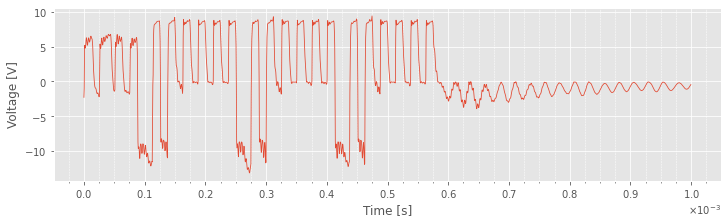

In [24]:
inpath = Path("data", "validering")
outpath = Path("plot", inpath.stem)
outpath.mkdir(exist_ok=True, parents=True)
alldata = dict()
for f in inpath.glob("transducer*.json"):
    with open(f, "r") as fd:
        alldata[f.stem] = json.loads(fd.read())

for k, v in alldata.items():
    out = Path(outpath, k+".pdf")
    
    data = np.array(v["data"])
    ddata = data[1:] - data[:-1]
    ithresh = (abs(ddata) > 1).nonzero()[0][0]
    data = data[ithresh:ithresh+2000]
    
    fs = v["fs"]
    x = np.arange(len(data)) / fs
    
    plt.close("all")
    fig, ax = plt.subplots()
    
    ax.plot(x, data)
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Voltage [V]")
    
    ax.grid(True, "minor", ls="--", lw=0.5)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(100e-6))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(25e-6))
    
    fig.savefig(out)

## Voltage over resistor

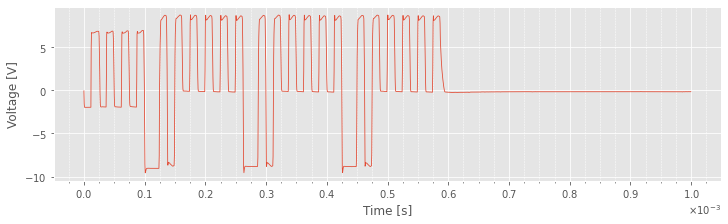

In [23]:
inpath = Path("data", "validering")
outpath = Path("plot", inpath.stem)
outpath.mkdir(exist_ok=True, parents=True)
alldata = dict()
for f in inpath.glob("resistor*.json"):
    with open(f, "r") as fd:
        alldata[f.stem] = json.loads(fd.read())

for k, v in alldata.items():
    out = Path(outpath, k+".pdf")
    
    data = np.array(v["data"])
    ddata = data[1:] - data[:-1]
    ithresh = (abs(ddata) > 1).nonzero()[0][0]
    data = data[ithresh:ithresh+2000]
    
    fs = v["fs"]
    x = np.arange(len(data)) / fs
    
    plt.close("all")
    fig, ax = plt.subplots()
    
    ax.plot(x, data)
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Voltage [V]")
    
    ax.grid(True, "minor", ls="--", lw=0.5)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(100e-6))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(25e-6))
    
    fig.savefig(out)

## Voltage over resistor/transducer comparison

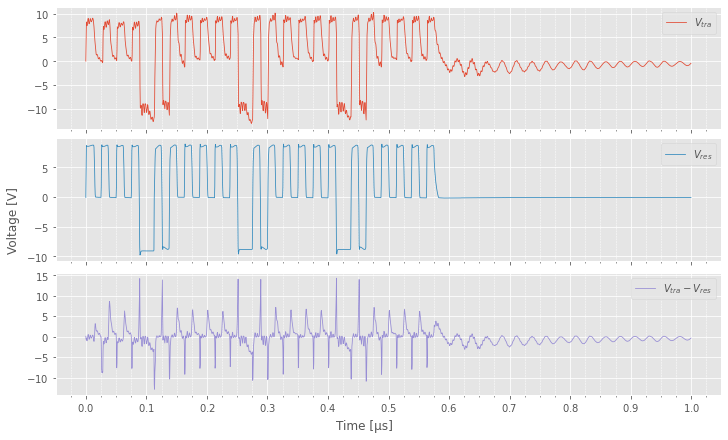

In [22]:
inpath = Path("data", "validering")
in_resistor = Path(inpath, "resistor_voltage_220506-193017.json")
in_transducer = Path(inpath, "transducer_voltage_220506-192750.json")
outpath = Path("plot", inpath.stem, "kontrol_voltage_comparison.pdf")

## Read data
with open(in_resistor, "r") as fd:
    rdata_res = json.loads(fd.read())
with open(in_transducer, "r") as fd:
    rdata_tra = json.loads(fd.read())

plt.close("all")
fig, axd = plt.subplot_mosaic([
    ["tra"],
    ["res"],
    ["diff"],
], sharex=True, figsize=(10,6))

fs_res = rdata_res["fs"]
data_res = np.array(rdata_res["data"])

fs_tra = rdata_tra["fs"]
data_tra = np.array(rdata_tra["data"])

## Clip to threshold
ddata_res = data_res[1:] - data_res[:-1]
ithresh_res = abs(ddata_res > 1).nonzero()[0][0]
data_res = data_res[ithresh_res:ithresh_res+2000]

ddata_tra = data_tra[1:] - data_tra[:-1]
itresh_tra = abs(ddata_tra > 1).nonzero()[0][0]
data_tra = data_tra[itresh_tra:itresh_tra+2000]

## Generate x axis
x = 1000 * np.arange(len(data_tra)) / fs_tra

## Plot data
axd["tra"].plot(x, data_tra, label="$V_{tra}$")
axd["res"].plot(x, data_res, c="C1", label="$V_{res}$")
axd["diff"].plot(x, data_tra - data_res, c="C2", label="$V_{tra} - V_{res}$")

fig.supylabel("Voltage [V]")
fig.supxlabel(u"Time [\u03bcs]")

for k, v in axd.items():
    v.xaxis.set_major_locator(plt.MultipleLocator(100e-3))
    v.xaxis.set_minor_locator(plt.MultipleLocator(25e-3))
    v.grid(True, "minor", ls="--", lw=0.5)
    v.legend()

fig.savefig(outpath)

## Current through transducer

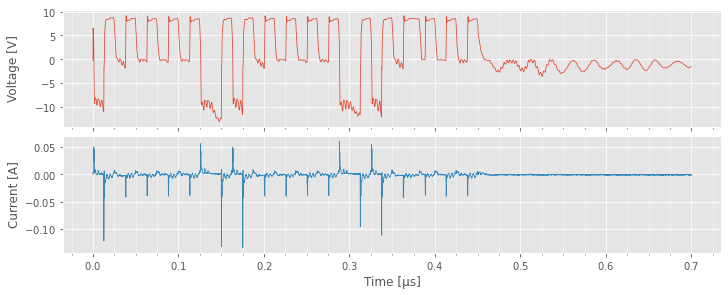

In [34]:
inpath = Path("data/validering/current_220506-202327.json")
outpath = Path("plot", inpath.parent.stem, inpath.stem + ".pdf")
outpath.parent.mkdir(exist_ok=True, parents=True)

with open(inpath, "r") as fd:
    rdata = json.loads(fd.read())

fs = rdata["fs"]
ch1, ch2 = np.array(rdata["data"]).T

ddata = ch2[1:] - ch2[:-1]
ithresh = abs(ddata > 1).nonzero()[0][0]
ch1 = ch1[ithresh:ithresh+7000]
ch2 = ch2[ithresh:ithresh+7000]

x = 1000 * np.arange(len(ch1)) / fs

fig, axd = plt.subplot_mosaic([["t"], ["b"]], sharex=True, figsize=(10, 4))

axd["t"].plot(x, ch2, c="C0")
axd["b"].plot(x, ch1 / 10, c="C1")

axd["t"].set_ylabel("Voltage [V]")
axd["b"].set_ylabel("Current [A]")
axd["b"].set_xlabel(u"Time [\u03bcs]")

for k, v in axd.items():
    v.xaxis.set_major_locator(plt.MultipleLocator(100e-3))
    v.xaxis.set_minor_locator(plt.MultipleLocator(25e-3))
    v.grid(True, "minor", ls="--", lw=0.5)

fig.align_labels()
fig.savefig(outpath)